In [12]:
from neo4j import GraphDatabase, basic_auth

In [13]:
driver = GraphDatabase.driver(
  "bolt://localhost:7687",
  auth=basic_auth("neo4j", "alex"))

In [14]:
cypher_query = '''
MATCH (a:Officer {name:$name})-[r:officer_of|intermediary_of|registered_address*..10]-(b)
RETURN b.name as name LIMIT 20
'''

### Github Example Query

In [15]:
with driver.session(database="neo4j") as session:
    results = session.read_transaction(
        lambda tx: tx.run(cypher_query,
                      name="Ross, Jr. - Wilbur Louis").data())
    
    for record in results:
        print(record['name'])

driver.close()

WL Ross & Co. LLC; 1166 Avenue of the Americas; 25th Floor; New York New York  11036; United States of America
WLR Recovery Fund IV L.P.
WLR IV CLPG L.P.
Walkers Corporate Services Limited, Walker House, 87 Mary Street, George Town; KY1-9005, Grand Cayman; Cayman Islands
Taiyo Greater India Fund GP Ltd.
Clifton House; 75 Fort Street; Grand Cayman KY1-1108; Cayman Islands
Dynap Management Ltd
DYNap Fund SPC
Clifton House; 75 Fort Street; Grand Cayman KY1-1108; Cayman Islands
Seville Holdings Ltd.
Coller International Partners IV-FD, L.P.
OGP IV (Caymans), Ltd.
AEI
Ghada A. Alireza Company, Ltd.
Offshore, Design & Contracting Ltd. ** INCOMPLETE **
ADAMAS INVESTMENTS LTD.
GRANITE HOLDINGS LTD.
Coller International General Partner IV, L.P.
Coller International Partners IV-E, L.P.
WEST BAY BEACH HOLDINGS


### More examples

In [16]:
cypher_query2 = '''
MATCH (o:Officer)-->(e:Entity)<-[:intermediary_of]-(i:Intermediary)
WHERE o.country_codes CONTAINS 'USA' and i.sourceID = 'Panama Papers'
RETURN e.jurisdiction_description AS jurisdiction, count(*) AS number
ORDER BY number DESC LIMIT 10
'''

In [25]:
with driver.session(database="neo4j") as session:
    results = session.run(cypher_query2)

    country = []
    val = []
    #print(results)
    for record in results:
        print(record)
        country.append(record.values()[0])
        val.append(record.values()[1])
        

driver.close()

<Record jurisdiction='British Virgin Islands' number=3441>
<Record jurisdiction='Bahamas' number=186>
<Record jurisdiction='Seychelles' number=178>
<Record jurisdiction='Panama' number=146>
<Record jurisdiction='Samoa' number=98>
<Record jurisdiction='British Anguilla' number=57>
<Record jurisdiction='Nevada' number=23>
<Record jurisdiction='Belize' number=7>
<Record jurisdiction='Hong Kong' number=3>
<Record jurisdiction='United Kingdom' number=3>


In [22]:
import matplotlib.pyplot as plt

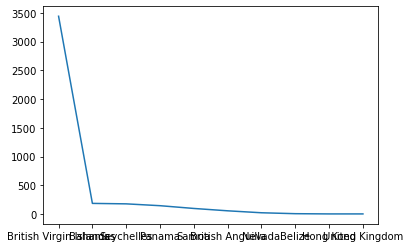

In [23]:
plt.plot(country,val)